<strong><font color=darkblue size=6>HW14, Dec-13</font></strong>

1. **Kaggle public LB rank & score**: rank 6, score 2.95991 
1. **Kaggle team name**: DV-We love Yale-Veips, Ruban, Poletaev
  1. Use format: `[ProGroup ID]-[Your fancy Kaggle group name]-[Team member names]`. 
  1. Eg. `DA-Dota-Lazareva,Iazykova,Ovyan` (see Rules in Kaggle for ProGroup ID)
1. Our Colab uses [CPU | **GPU** | TPU]

Your private LB score must be reproducible with this Colab. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation). Don't exceed runtime.

<hr color=darkblue>

# 🤔**Task 1: Theory (DSBA/ICEF only)**

## **Task 1.1**

Assume we have $n$ independent $y_i \sim N(\mu,1)$. Find the MLE solution and show that it is similar to the least squares solution $\sum (y_i - \mu)^2$. Also investigate whether the maximun likelihood is unbiased estimator of $\mu$ and find the variance. Remember to justify all steps!

### **SOLUTION**

Let's first find the PDF:

1) $\frac{1}{\sqrt{2\pi}\ }
                               \exp\left(-\frac {(y-\mu)^2}{2} \right)$
,from that the likelihood is the following:

2)$f(y_1,\ldots,y_n \mid \mu) = \prod_{i=1}^n f( y_i\mid  \mu) = \left( \frac{1}{2\pi} \right)^{n/2} \exp\left( -\frac{ \sum_{i=1}^n (y_i-\mu)^2}{2}\right)$

3)The next step in the log-likelihood, which looks as: 
$\ln\Bigl( \mathcal{L} (\mu)\Bigr) =
   - \frac{1}{2} \sum_{i=1}^n (\,y_i-\mu\,)^2 -\frac{\,n\,}{2} \log(2\pi)$

4)The derivative is:

$$
\frac{\partial}{\partial \mu} \log\Bigl( \mathcal{L} (\mu)\Bigr) =-\frac{\partial}{\partial \mu} \frac{\,n\,}{2} \log(2\pi)
   - \frac{\partial}{\partial \mu}\frac{1}{2} \sum_{i=1}^n (\,y_i-\mu\,)^2=
 0 - \frac{\;-2\!n(\sum^n_{i=1} \frac{\,y_i\,}{n}-\mu)\;}{2}=
 \;\!n\left(\sum^n_{i=1} \frac{\,y_i\,}{n}-\mu\right)\
$$

5) Invistigating extremas:

$n\left(\sum^n_{i=1} \frac{\,y_i\,}{n}-\widehat{\mu}_{\text{ML}}\right) = 0 $,$ $ therefore $ $ $\widehat{\mu}_{\text{ML}} = \sum^n_{i=1} \frac{\,y_i\,}{n} = \bar{y}$

6)By finding the second derivative one may confim that the result is indeed the maximum:

$ \frac{\partial}{\partial \mu} n\left(\sum^n_{i=1} \frac{\,y_i\,}{n}-\mu\right) = -n < 0$


--------------------------------------------------------------------------------------------------------------------------------------------------------------
**LEAST SQUARES**

$\hat{\mu}_{LS} = \mathop{\mathrm{argmin}}\sum_{i=1}^{n} \big( y_{i} - \mu \big)^{2}$

1) derivative:$ $ $
\frac{\partial}{\partial \mu} \sum_{i=1}^{n} \big( y_{i} - \mu \big)^{2} = 
\frac{\partial}{\partial \mu} \sum_{i=1}^{n} \big( y_{i}^2 + \mu^2 - 2y_{i} \mu\big) =  \sum_{i=1}^{n} 2\mu - \sum_{i=1}^{n}2y_{i} = 2 n \mu - \sum_{i=1}^{n}2y_{i}
$

2)The derivative = 0 to find extremas:

$ 2 n \hat{\mu}_{LS} - \sum_{i=1}^{n}2y_{i} = 0 $, so $ n \hat{\mu}_{LS} = \sum_{i=1}^{n}y_{i} $, thus $\hat{\mu}_{LS} = \sum^n_{i=1} \frac{\,y_i\,}{n} = \bar{y}$

3)second derivative to confirm the minimum: 

$$\frac{\partial}{\partial \mu} \left(2 n \mu - \sum_{i=1}^{n}2y_{i}\right) = 2n > 0 $$

-------------------------------------------------------------------

**BIAS AND VARINACE** 

1) $\operatorname{E}\left(\widehat{\mu}_{\text{ML}}\right) = \operatorname{E}\left(\sum^n_{i=1} \frac{\,y_i\,}{n} \right) = \frac{1}{n}\operatorname{E}\left(\sum^n_{i=1} y_i\right) = \frac{1}{n} (n \cdot \mu) = \mu$, theredore it is unbiased


2) $\operatorname{Var}\left(\widehat{\mu}_{\text{ML}}\right) = \operatorname{Var}\left(\sum^n_{i=1} \frac{\,y_i\,}{n} \right) = \frac{1}{n^2}\operatorname{Var}\left(\sum^n_{i=1} y_i\right) = \frac{1}{n^2}\sum^n_{i=1} \operatorname{Var}y_i = \frac{1}{n^2} \cdot n = \frac{1}{n}$

## **Task 1.2**

Next, suppose we use the penalized least squares model with the following minimization task:

$$\hat \mu_p = \text{argmin}_{\mu} (\sum_{i=1}^n (y_i - \mu)^2 + \lambda (2 - \mu)^2 ), \text{ where } \lambda \geq 0$$

Find $\hat \mu_p$, its bias and variance. Compare $\text{var} \hat\mu_p$ with $\text{var} \hat\mu_{\text{MLE}}$


### **SOLUTION**

1)the derivative:$\frac{\partial}{\partial\mu}\left(\sum_{i=1}^n (y_i - \mu)^2 + \lambda (2 - \mu)^2 \right) = \frac{\partial}{\partial\mu}\sum_{i=1}^n (y_i - \mu)^2 + \frac{\partial}{\partial\mu}\lambda (2 - \mu)^2 = \sum_{i=1}^n (-2y_i + 2\mu) + \lambda (-4 +2 \mu) =   2\sum_{i=1}^n (\mu-y_i) + 2\lambda (\mu-2) =2\sum_{i=1}^n \mu-2\sum_{i=1}^ny_i + 2\lambda (\mu-2) = 2n\mu-2\sum_{i=1}^ny_i -4\lambda+ 2\lambda\mu$

2) derivative = 0 to find extremas:$ $
$2n\hat\mu_{p}-2\sum_{i=1}^ny_i + 2\lambda\hat\mu_{p}-4\lambda = 0 $, therefore
$$n\hat\mu_{p}-\sum_{i=1}^ny_i + \lambda\hat\mu_{p}-2\lambda = 0 $$
$$\hat\mu_{p}=\frac{\sum_{i=1}^ny_i +2\lambda}{n+\lambda} $$

3) The second derivative to confirm the result is indeed the min:$  $ $  \frac{\partial}{\partial \mu}\left(2n\mu-2\sum_{i=1}^ny_i + 2\lambda\mu-4\lambda\right) = 2(n + \lambda) > 0$

-------------------------------

**BIAS AND VARIANCE** 

1) $\operatorname{E} \left(\hat\mu_{p} \right)=\operatorname{E} \left(\frac{\sum_{i=1}^ny_i +2\lambda}{n+\lambda}\right)= \operatorname{E} \left(\frac{\sum_{i=1}^ny_i}{n+\lambda}+\frac{2\lambda}{n+\lambda}\right) =\operatorname{E} \left(\frac{\sum_{i=1}^ny_i}{n+\lambda}\right) +\frac{2\lambda}{n+\lambda}= \frac{1}{n+\lambda} \operatorname{E}\left(\sum_{i=1}^ny_i\right) +\frac{2\lambda}{n+\lambda} = \frac{1}{n+\lambda} \left(\sum_{i=1}^n \operatorname{E} (y_i)\right) +\frac{2\lambda}{n+\lambda} = \frac{n\cdot \mu}{n+\lambda} +\frac{2\lambda}{n+\lambda} = \mu \cdot \frac{n}{n+\lambda} +\frac{2\lambda}{n+\lambda}$,  unbiased only if $\lambda = 0$  

2) $ $ $\operatorname{Var} \left(\hat\mu_{p} \right)=\operatorname{Var} \left(\frac{\sum_{i=1}^ny_i +2\lambda}{n+\lambda}\right)= \operatorname{Var} \left(\frac{\sum_{i=1}^ny_i}{n+\lambda}+\frac{2\lambda}{n+\lambda}\right) =\operatorname{Var} \left(\frac{\sum_{i=1}^ny_i}{n+\lambda}\right) = \frac{1}{(n+\lambda)^2} \operatorname{Var}\left(\sum_{i=1}^ny_i\right) = \frac{1}{(n+\lambda)^2} \left(\sum_{i=1}^n\operatorname{Var}y_i\right) = \frac{n}{(n+\lambda)^2}$

$\operatorname{Var} (\hat\mu_{\text{MLE}}) = \operatorname{Var} (\hat\mu_{p})$only in case when both $\lambda = 0$ and $\operatorname{Var} (\hat\mu_{\text{MLE}}) > \operatorname{Var} (\hat\mu_{p})$. In  other cases
$ \operatorname{Var} \hat\mu_{\text{MLE}} >= \operatorname{Var} \hat\mu_{p}$

## **Task 1.3**

Give a substantial answer why we might prefer Ridge over LASSO and vice versa?

### **SOLUTION**

LASSO is preferable when one is willing to perdrom variable selection, dropping several paremetres on the way. LASSO "includes" natural variable selection. On the other hand, there Ridge regression which main aim is to reduce the biased parameter estimates' variance. In turn, that implies that best parametres subsest selection will be not performed, since each is included. Ridge regression is better approach when one would like to use all parametres.

<hr color=darkblue>

# 📍**Task 2: Kaggle-Graphs (for DSBA/ICEF) - due first week of Spring Semester**

<details><summary><font color=darkblue>More info and Kaggle API instructions</font></summary>

**Private URL** for students (allows submission) is in Moodle's HW assignment. **Public URL** with read-only access is [here](https://www.kaggle.com/c/hse-ml-hw13-dec-6-venus-vs-mars/rules). See competition rules, submission, grading, dataset, and performance metric. The **starter code** below produces a baseline model, which you should beat, while respecting the competition rules. Your code starts after the timer. This is your baseline model. Seed all [RNG](https://en.wikipedia.org/wiki/Random_number_generation) for reproducibility!

**Instructions for enabling Kaggle API in Colab**:
1. Accept competition rules before running [Kaggle API](https://github.com/Kaggle/kaggle-api#api-credentials). [Loading Kaggle dataset example](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab)
1. In your Kaggle Account, [Create API Token](https://github.com/Kaggle/kaggle-api#api-credentials) and save the resulting **kaggle.json** file to the [root of your Google Drive](https://drive.google.com/drive/u/0/my-drive) 
2. In Colab, open **Files** panel 🗀 (on the left) and click gray folder icon <font color=gray>🖿</font> to mount your Google drive

Your Kaggle/Google Drive credentials are secure; and Colab's kaggle.json only lasts a Colab session.

</details>


In [ ]:
#@title
!pip -q install --upgrade --force-reinstall --no-deps kaggle > log  # upgrade kaggle package (to avoid a warning)
!mkdir -p ~/.kaggle                                           # .kaggle folder must contain kaggle.json for kaggle executable to properly authenticate you to Kaggle.com
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json >log  # First, download kaggle.json from kaggle.com (in Account page) and place it in the root of mounted Google Drive
!cp kaggle.json ~/.kaggle/kaggle.json > log                   # Alternative location of kaggle.json (without a connection to Google Drive)
!chmod 600 ~/.kaggle/kaggle.json                              # give only the owner full read/write access to kaggle.json
!kaggle config set -n competition -v hse-ml-hw14-dec-13-graphs  # set the competition context for the next few kaggle API calls. !kaggle config view - shows current settings
!kaggle competitions download >> log                          # download competition dataset as a zip file
!unzip -o *.zip >> log                                        # Kaggle dataset is copied as a single file and needs to be unzipped.
!kaggle competitions leaderboard --show                       # print public leaderboard

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
- competition is now set to: hse-ml-hw14-dec-13-graphs
Using competition: hse-ml-hw14-dec-13-graphs
 teamId  teamName                                  submissionDate       score     
-------  ----------------------------------------  -------------------  --------  
7958877  IvanushkinaEkaterina                      2022-01-14 17:08:40  2.63100   
7935299  Jingtao Xu                                2022-01-16 15:45:38  2.74934   
8000373  Lukianov Matvei                           2022-01-14 12:42:24  2.89425   
8009867  Yaroslav Ruban                            2022-01-16 17:02:56  2.95991   
8010400  Igor Poletaev                             2022-01-16 16:59:24  2.96485   
7915353  Aleksandr Odnakov                         2022-01-14 22:30:20  3.01562   
8010737  Liya Omarova                              2022-01-16 17:09:40  3.02590   
8007669  Emil Fakhretdinov                         2022-01-16 15:08:55  3

In [ ]:
!nvidia-smi --query-gpu=gpu_name,memory.total,memory.free,memory.used --format=csv

name, memory.total [MiB], memory.free [MiB], memory.used [MiB]
Tesla T4, 15109 MiB, 8109 MiB, 7000 MiB


In [ ]:
%%time
%%capture
%reset -f
!pip -q install -U tensorflow_addons plotly > log   # update tfa in case students need to use it
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all" 
import numpy as np, pandas as pd, time, matplotlib.pyplot as plt, os, tqdm, re, sys, cv2, skimage
# os.environ['TF_DETERMINISTIC_OPS'] = '1'  # causes an error (?)   https://github.com/tensorflow/tensorflow/issues/38197
import tensorflow_addons as tfa, tensorflow as tf, tensorflow.keras as keras, tensorflow_datasets as tfds
from keras.layers import Flatten, Dense, Dropout, MaxPooling2D, Conv2D, Input
from keras.models import Sequential
ToCSV = lambda df, fname: df.round(2).to_csv(f'{fname}.csv', index_label='id') # rounds values to 2 decimals

class Timer():
  def __init__(self, lim:'RunTimeLimit'=60*5): self.t0, self.lim, _ = time.time(), lim, print(f'⏳ started. You have {lim} sec. Good luck!')
  def ShowTime(self):
    msg = f'Runtime is {time.time()-self.t0:.0f} sec'
    print(f'\033[91m\033[1m' + msg + f' > {self.lim} sec limit!!!\033[0m' if (time.time()-self.t0-1) > self.lim else msg)

np.set_printoptions(linewidth=100, precision=2, edgeitems=2, suppress=True)
pd.set_option('max_columns', 20, 'precision', 2, 'display.max_rows', 4)
tDIR, sDIR = 'trainXY/', 'testY/'

CPU times: user 419 ms, sys: 130 ms, total: 549 ms
Wall time: 3.24 s


In this assignment you need to predict 7 attributes of a graph using the graph's (black and white, single channel) image, CNN, and additional tricks. The output values are stored in the file name of each image. In this competition you have more images than you can directly fit in free Colab Notebook's RAM or GPU/GPU memory. So, you need to make wise resources allocation and sampling. Here is the anatomy of a file name: 

`111C_n11e40x9r2d2c6q6o1g0u0b0.png` => `111 C _ n11 e40 x9 r2 d2 c6 q6 o1 g0 u0 b0.png`
 
1. 111 = file ID
1. Plot type (preceding underscore): `C`=circular, `P`=planar, `S`=spring, `R`=other
1. `n` = # of nodes (vertices)
1. `e` = # of edges
1. `x` = max degree
1. `r` = radius (or -1 if not applicable)
1. `d` = diameter (or -1 if not applicable)
1. `c` = number of cliques
1. `q` = size of max clique
1. `o` = is connected (0=no, 1=yes) - not predicted
1. `g` = is regular (0=no, 1=yes) - not predicted
1. `u` = is Eulerian (0=no, 1=yes) - not predicted
1. `b` = is bipartite (0=no, 1=yes) - not predicted


Below are examples of the training images.


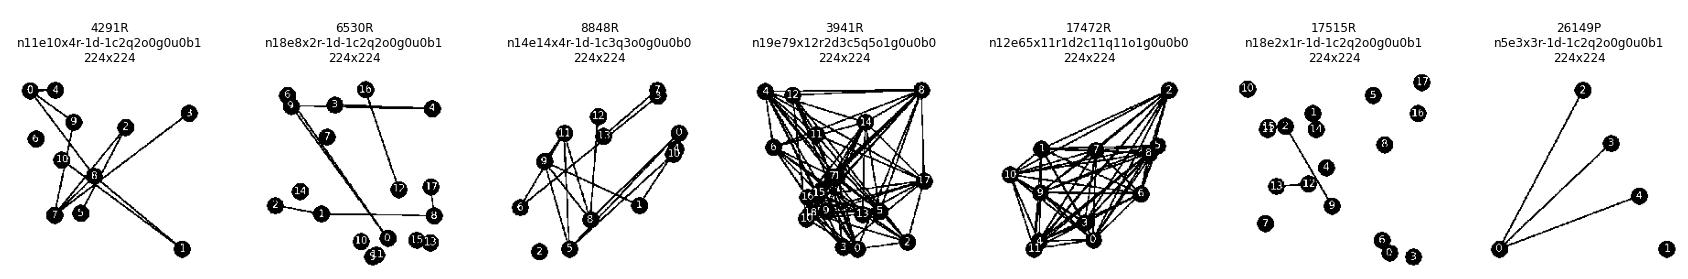

In [ ]:
n, fig = 7, plt.figure(figsize=(30,5));
for i, sFileName in enumerate(os.listdir(tDIR)[:n]):
  ax = plt.subplot(1, n, i + 1)
  img = tf.keras.preprocessing.image.load_img(tDIR + sFileName);
  sFileName = sFileName.replace("_","\n").replace(".png","")
  _ = ax.set_title(f'\n{sFileName}\n{img.size[0]}x{img.size[1]}');
  _ = plt.axis('off');   _ = plt.imshow(img);

In [ ]:
print(f'size of "tf" =', sys.getsizeof(tf)) # object size in bytes
np.iinfo(np.uint32)                         # use smallest possible data type to concerve RAM and speed up processing

size of "tf" = 88


iinfo(min=0, max=4294967295, dtype=uint32)

In [ ]:
!free   # keep an eye on your free RAM ! Delete trash

              total        used        free      shared  buff/cache   available
Mem:       13302920     7250488      199636       15532     5852796    10374320
Swap:             0           0           0


In [ ]:
tmr = Timer() # runtime limit (in seconds). Add all of your code after the timer

⏳ started. You have 300 sec. Good luck!


<font size=5>⏳</font> <strong><font color=orange size=5>Your Code, Documentation, Ideas and Timer - All Start Here...</font></strong>

**Student's Section** (is between ⏳ symbols): is where students add their code and documentation.


## **Task 2.1**

**Explain your preprocessing:** i.e. feature engineering, subsampling, clustering, dimensionality reduction, etc.

First of all, I used GPU instead of TPU as it working faster on bigger samples. 

Next idea was increasing training sample up to 20000 to train model better. 

## **Task 2.2**

**Explain your modeling approach:** ideas you tried and why you thought they would be helpful. Takeaway: how these decisions guided you in modeling.

First of all, increased number of epochs to increase training accuracy, moreover reduced batch size to 600, to train more batches during each epoch.

Second idea was rounding diameter and radius values as these values are obviously integer numbers. Subsample with rounded diameter and radius used as the second variant. 

The next cell enables TPU in ~10-15 sec and offers 64GB RAM vs 12GB in Tesla K80 GPU. Your model might train faster. Ultimately it's your choice, so we leave it in the Student's Section.

In [ ]:
#resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')  # Source: https://www.tensorflow.org/guide/tpu
#tf.config.experimental_connect_to_cluster(resolver)
#tf.tpu.experimental.initialize_tpu_system(resolver)                   # TPU initialization code that has to be at the beginning.
#print("All devices: ", tf.config.list_logical_devices('TPU'))

TPU cannot use TF Datasets, but DataSets can load images via buffer, thereby freeing Colab's RAM. Loading method is your decision. FYI: with a dataset you need to keep track of the output labels.
 
 


In [ ]:
%%time
GetNums  = lambda sFilePath: list(map(np.int32, filter(None, re.split('[a-zA-Z_.]', os.path.basename(sFilePath)))))
ReadGray = lambda sFilePath: (cv2.imread(sFilePath, cv2.IMREAD_GRAYSCALE)/255).astype(np.uint8)
SplitY   = lambda nums: (nums[0], nums[1:])

nTrain = 20000
_, tY, tX = list(zip(*([(*SplitY(GetNums(tDIR+f)), ReadGray(tDIR+f)) for f in os.listdir(tDIR)[:nTrain]])))  # load labels and imaegs from training folder
tX, tY = np.asarray(tX, dtype=np.uint8), np.asarray(tY, dtype=np.int16)[:,:7]  # you only need to predict first 7 fields

sIDs, sX = list(zip(*([(sDIR+f, ReadGray(sDIR+f)) for f in os.listdir(sDIR)])))        # load IDs and images from testing folder
sIDs = [int(re.sub('\D','',s)) for s in sIDs]  # extract just the numbers
sX = np.asarray(sX, dtype=np.uint8)

print('tX.shape:', tX.shape, 'tY.shape:', tY.shape, 'sX.shape:', sX.shape)

tX.shape: (20000, 224, 224) tY.shape: (20000, 7) sX.shape: (2000, 224, 224)
CPU times: user 11.7 s, sys: 15.6 s, total: 27.3 s
Wall time: 27.2 s


It might be helpful to evaluate the distribution of graph attributes

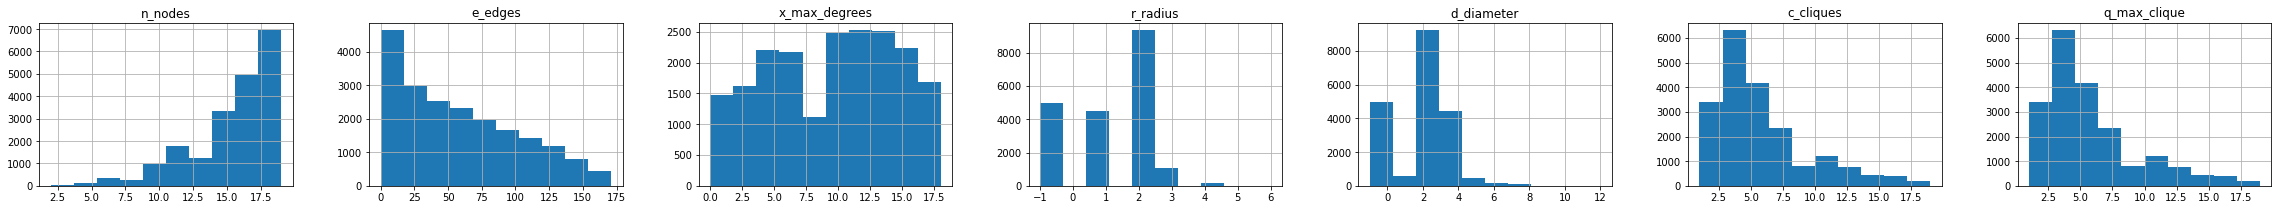

In [ ]:
LsCols = ['n_nodes', 'e_edges', 'x_max_degrees', 'r_radius', 'd_diameter', 'c_cliques', 'q_max_clique']
pd.DataFrame(tY, columns=LsCols).hist(figsize=(40,3), layout=(1,7)); # Frequencies of different target levels may guide your CNN loss weigthing strategy

In [ ]:
!free   # keep an eye on your free RAM ! Delete trash

              total        used        free      shared  buff/cache   available
Mem:       13302920     7262460      185576       15532     5854884    10374280
Swap:             0           0           0


Below is a baseline model with many opportunities to improve it (and learn from it). You can choose a 7 dimensional dense layer as output or seven 1D outputs each of which can be fine-tuned separately.

In [ ]:
%%time
GetWeights = lambda v: v/sum(v) # computes loss importance to each output. Ensures sum(weights)=1
tf.random.set_seed(0)           # always seed your experiments
Init = keras.initializers.RandomNormal(seed=0) # always seed your experiments

I1 = keras.layers.Input(shape=[224, 224, 1], name='I1')   # input image size: spacial spatial and channels
C1 = Conv2D(filters=2, kernel_size=5, activation='relu', padding='same', kernel_initializer=Init, name='C1')(I1)
P1 = MaxPooling2D(pool_size=2, name='P1')(C1)
F1 = Flatten(name='F1')(P1)
D1 = Dense(100, activation='relu', kernel_initializer=Init, name='D1')(F1)
R1 = Dropout(0.2, name='R1')(D1)
O1 = Dense(len(LsCols), kernel_initializer=Init, name='O1')(R1)

# O1 = [Dense(1, activation=None, kernel_initializer=Init, name=c)(R1) for c in LsCols]  # creates individual outputs with individual loss weights
# loss_weights = dict(zip(LsCols, GetWeights(tY.mean(axis=0)*[1,2,1,1,1,1,1])))  # doubles the weight of target losses computed from target means

opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam',)
m = keras.Model(inputs=I1, outputs=O1)
m.compile(loss=['mse'], optimizer=opt)
keras.utils.plot_model(m, to_file='model.png', show_shapes=True, show_dtype=True, dpi=80)  # Double click the saved file to view the model
hist = m.fit(x=tX, y=tY, epochs=60, batch_size=600, validation_split=0.2)

Epoch 1/60
27/27 [==============================] - 3s 84ms/step - loss: 411.1708 - val_loss: 290.0626
Epoch 2/60
27/27 [==============================] - 2s 74ms/step - loss: 257.8139 - val_loss: 193.3961
Epoch 3/60
27/27 [==============================] - 2s 75ms/step - loss: 162.3547 - val_loss: 122.0323
Epoch 4/60
27/27 [==============================] - 2s 73ms/step - loss: 107.9815 - val_loss: 78.1334
Epoch 5/60
27/27 [==============================] - 2s 73ms/step - loss: 71.6098 - val_loss: 50.0129
Epoch 6/60
27/27 [==============================] - 2s 73ms/step - loss: 51.4474 - val_loss: 37.5216
Epoch 7/60
27/27 [==============================] - 2s 73ms/step - loss: 42.1143 - val_loss: 31.4827
Epoch 8/60
27/27 [==============================] - 2s 73ms/step - loss: 37.3967 - val_loss: 28.0535
Epoch 9/60
27/27 [==============================] - 2s 73ms/step - loss: 34.1718 - val_loss: 24.8495
Epoch 10/60
27/27 [==============================] - 2s 73ms/step - loss: 30.7270 - 

The distribution of output values may highlight problematic outputs (compare to training labels).

,n_nodes,e_edges,x_max_degrees,r_radius,d_diameter,c_cliques,q_max_clique
2023,13.56,5.22,2.15,0,0,1.83,1.83
1576,16.96,92.27,13.68,2,2,7.31,7.35
...,...,...,...,...,...,...,...
1306,15.43,88.26,12.07,1,2,7.75,7.76
2216,16.65,76.86,11.15,1,2,6.75,6.76


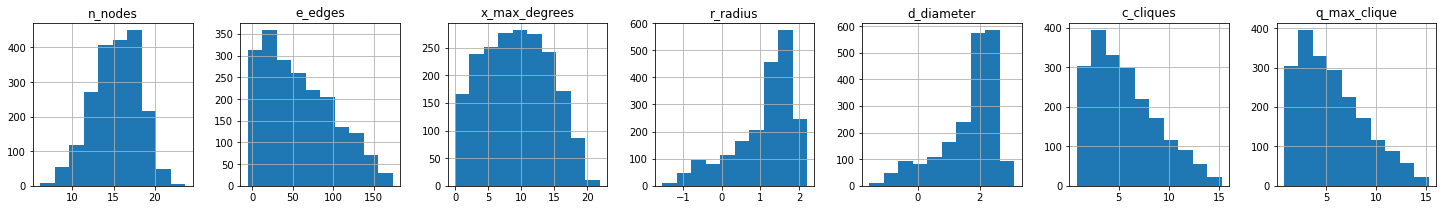

In [ ]:
pY = pd.DataFrame(m.predict(sX), columns=LsCols, index=sIDs)  # ensure that labels and observations are in corresponding order
copy_1 = pY
_ = pY.hist(figsize=(40,3), layout=(1,11));
ToCSV(pY, 'output_1')
#copy_1["d_diameter"] = copy_1["d_diameter"].apply(round)
#copy_1["r_radius"] = copy_1["r_radius"].apply(round)
#ToCSV(copy_1, 'output_copy')
#copy_1

<font size=5>⏳</font> <strong><font color=orange size=5>Do not exceed competition's runtime limit!</font></strong>


In [ ]:
tmr.ShowTime()    # measure Colab's runtime. Do not remove. Keep as the last cell in your notebook.

Runtime is 149 sec


## 💡**Starter Ideas**

1. As usual, you can tune hyperparameters or network architecture to beat the baseline
1. Try individually weighted target losses. Recall: MSE is sensitive to extreme output values
1. Try more observations, but you'll need to optimize data structures and memory utilization
1. Try GPU vs TPU (to speed up processing more observations)
1. Evaluate which test cases have biggest damage to your model's performance
  1. Try more observations for most-damaging test cases
  1. Try image augmentation for most-damaging test cases
1. Try pre-trained model from Keras, TensorFlow, PyTorch
1. Try a different encoding of `-1` output values (for radius and diameter)
1. Try one hot encoding for outputs with fewer levels, such as radius
1. Learn about graph theory [&#127910;](https://www.youtube.com/results?search_query=graph+theory), grahical models [&#127910;](https://www.youtube.com/results?search_query=graphical+models), graph cliques [&#127910;](https://www.youtube.com/results?search_query=graph+cliques), social network graphs [&#127910;](https://www.youtube.com/results?search_query=social+networks+graphs), Undirected Graphical Models in [📔ESL17](https://hastie.su.domains/ElemStatLearn/printings/ESLII_print12.pdf#page=664)
1. *Algorithmic constraints*: try cleaning your predictions with constraints. 
  1. E.g. a graph with 0 edges must have zero in many other columns
  1. E.g. a graph respects [`e≤(n*(n-1)/2)`](https://en.wikipedia.org/wiki/Complete_graph), [`r≤d≤e`](https://en.wikipedia.org/wiki/Distance_(graph_theory)#Related_concepts), `x≤e`, [`q≤e`](https://en.wikipedia.org/wiki/Clique_(graph_theory))
1. *DNN constraints*: You can add these rules as outputs and even heavily penalize the model for violating constraints
      1. E.g. a binary target `(r≤d)*1` can be predicted with `Dense(1, 'sigmoid')` output and greater weight
1. Try using unused outputs (`o`, `g`, `u`, `b`) to tune model predictions of other columns
1. Try adding classical features (to CNN) built with [CV2](https://opencv.org), [SKLearn-image](https://scikit-image.org/)
  1. E.g. spectral representation, edge/circle/crossover/corner detectors, [HOG](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)
1. Try file size, time stamp, and plot type (C,R,S,P) as extra input features
  1. Note: some competitions may disallow such features (as irrelevant)